In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [109]:
df=pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv') 

In [110]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [111]:
df[ "FullDate" ] = pd.to_datetime(df[ "FullDate" ]) #convert column to datetime 
df.set_index( "FullDate" , inplace= True )

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92016 entries, 2010-09-01 00:00:00 to 2021-02-28 23:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       92016 non-null  float64
 1   SysLoad    92016 non-null  float64
 2   GasPrice   92016 non-null  float64
 3   ElecPrice  92016 non-null  float64
dtypes: float64(4)
memory usage: 3.5 MB


In [113]:
df.columns

Index(['Tmax', 'SysLoad', 'GasPrice', 'ElecPrice'], dtype='object')

In [114]:
df.shape

(92016, 4)

In [115]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [116]:
#Upsample to daily data points 
df_daily = df.resample( 'D' ).sum()

In [117]:
df_daily.head

<bound method NDFrame.head of              Tmax      SysLoad  GasPrice  ElecPrice
FullDate                                           
2010-09-01  379.2  41565.38000   88.5600   2751.700
2010-09-02  369.6  38898.99000   88.5600    570.810
2010-09-03  439.2  41665.76000  106.8000    504.975
2010-09-04  328.8  35638.08500   81.3600    502.275
2010-09-05  357.6  35611.41000  106.8000    500.555
...           ...          ...       ...        ...
2021-02-24  537.6  -1525.49745  134.4000    634.770
2021-02-25  518.4   4539.07855  130.5048    577.515
2021-02-26  547.2   9517.02430  130.1808   1445.495
2021-02-27  564.0   4932.88015  130.0800    488.980
2021-02-28  583.2   6675.05485  131.6352    -98.985

[3834 rows x 4 columns]>

Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

Text(0, 0.5, 'ElecPrice')

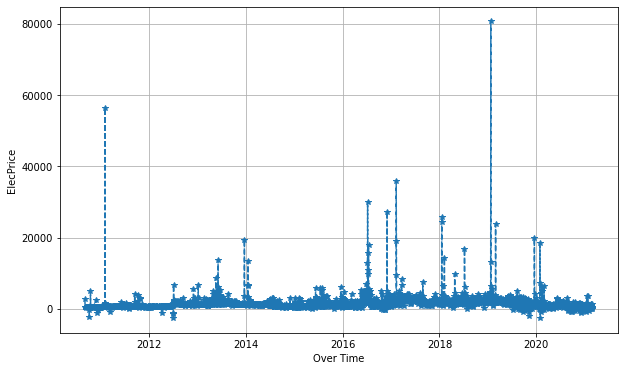

In [118]:
plt.figure(figsize=( 10 , 6 )) 
plt.plot(df_daily.index, df_daily.ElecPrice, '--' , marker= '*' , ) 
plt.grid() 
plt.xlabel( 'Over Time' ) 
plt.ylabel( 'ElecPrice' ) 

In [119]:
#check for missing values 
df.isnull().values.any() 
#There are no missing values in our dataset however, in bid to explain how we handle 

False

In [120]:
df_daily.shape

(3834, 4)

Text(0, 0.5, 'ElecPrice')

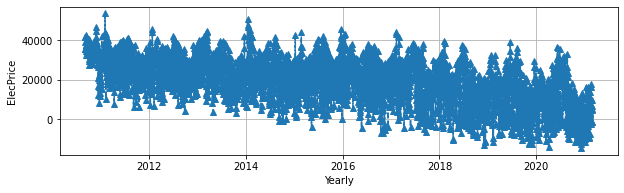

In [121]:
plt.figure(figsize=( 10 , 6 ))

plt.subplot(2,1,1)
plt.plot(df_daily.index, df_daily.SysLoad, '--' , marker= '^' , ) 
plt.grid() 
plt.xlabel('Yearly') 
plt.ylabel('ElecPrice')

Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [122]:
from statsmodels.tsa.stattools import adfuller 
adf_result = adfuller(df_daily[ 'SysLoad' ])  
print(f'p-value: {adf_result[ 1 ]}') 

p-value: 0.004253725504574117


In [123]:
adf_result = adfuller(df_daily[ 'GasPrice' ]) 
print(f'p-value: {adf_result[ 1 ]}') 

p-value: 0.04502721288462542


Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [124]:
adf_result = adfuller(df_daily[ 'GasPrice' ]) 
print( 'Critical Values:' ) 
for k, v in adf_result[ 4 ].items(): 
    print(f'    {k}: {v}')

Critical Values:
    1%: -3.4320693157877544
    5%: -2.8622996992165364
    10%: -2.5671743978048323


In [125]:
adf_result = adfuller(df_daily[ 'ElecPrice' ]) 
print( 'Critical Values:' ) 
for k, v in adf_result[ 4 ].items(): 
    print(f'    {k}: {v}')

Critical Values:
    1%: -3.432066157296446
    5%: -2.8622983040036005
    10%: -2.5671736550459663


Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [126]:
#Train and Test model
train = df_daily.iloc[:2757, :]
train.shape

(2757, 4)

In [127]:
test = df_daily.iloc[2757:, :]
test.shape

(1077, 4)

In [128]:
# Reset the index
train.reset_index(inplace = True)
train.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [129]:
train_df = train.iloc[:,[0,-1]]
train_df = train_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
train_df.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [130]:
# Reset the index
test.reset_index(inplace = True)
test.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2018-03-20,540.0,7696.91130,201.5880,1833.00
1,2018-03-21,571.2,4658.05865,203.2560,1730.49
2,2018-03-22,722.4,19161.78525,203.2560,2260.55
3,2018-03-23,811.2,18090.43435,198.6456,2138.76
4,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [131]:
# we have to rename the FullDate and ElecPrice columns as follows
test_df = test.iloc[:,[0,-1]]
test_df = test_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
test_df.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [132]:
#Create a Prophet model and fit it to the training data
model = Prophet()
model.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3thssn2a/u4x3d8j8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3thssn2a/qw9l2_j8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87488', 'data', 'file=/tmp/tmp3thssn2a/u4x3d8j8.json', 'init=/tmp/tmp3thssn2a/qw9l2_j8.json', 'output', 'file=/tmp/tmp3thssn2a/prophet_modelvf__xdna/prophet_model-20230131195536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:55:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:55:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [133]:
#generate predictions for the test set
forecast = model.predict(test_df) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2684.565824,59.670476,4976.349617,2684.565824,2684.565824,-155.040628,-155.040628,-155.040628,9.737379,9.737379,9.737379,-164.778008,-164.778008,-164.778008,0.0,0.0,0.0,2529.525196
1,2018-03-21,2685.359782,457.640175,4970.767699,2685.359782,2685.359782,-2.567491,-2.567491,-2.567491,159.353195,159.353195,159.353195,-161.920686,-161.920686,-161.920686,0.0,0.0,0.0,2682.792291
2,2018-03-22,2686.153740,379.742349,5197.816950,2686.153740,2686.153740,95.607310,95.607310,95.607310,257.107547,257.107547,257.107547,-161.500237,-161.500237,-161.500237,0.0,0.0,0.0,2781.761050
3,2018-03-23,2686.947698,240.890461,4960.172979,2686.947698,2686.947698,-113.077820,-113.077820,-113.077820,50.273097,50.273097,50.273097,-163.350918,-163.350918,-163.350918,0.0,0.0,0.0,2573.869878
4,2018-03-24,2687.741656,-124.665314,4485.521342,2687.741656,2687.741656,-438.673661,-438.673661,-438.673661,-271.443120,-271.443120,-271.443120,-167.230541,-167.230541,-167.230541,0.0,0.0,0.0,2249.067995


In [134]:
#MAPE function, as required
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [135]:
MAPE = Metric(test_df['y'],forecast['yhat'])
round(MAPE,2)

544.73

What is the RMSE in 2 decimal places?

In [136]:
from sklearn import metrics
RMSE = np.sqrt(metrics.mean_squared_error(test_df['y'],forecast['yhat']))
round(RMSE,2)

3208.06

If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

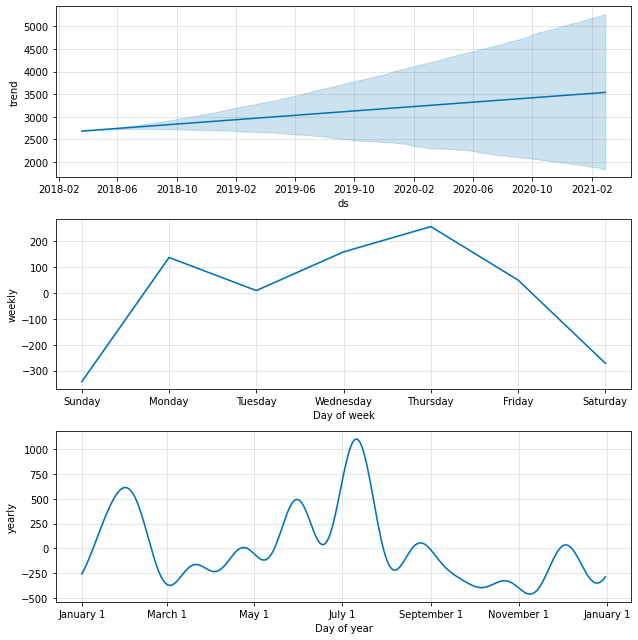

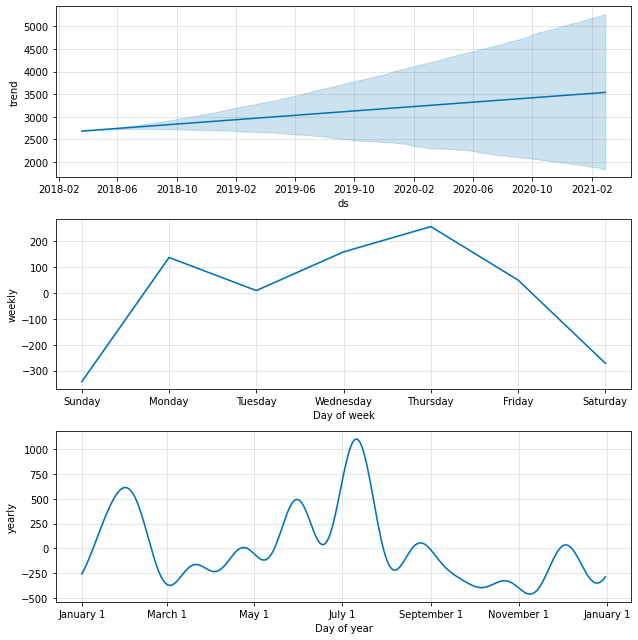

In [137]:
#forecast
#model.plot(forecast)
model.plot_components(forecast)


From the plot, the month with highest values is July.

Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [138]:
# Reset the index
df_daily.reset_index(inplace=True)

In [139]:
# Rename the columns to match the required format for Prophet
rnm = df_daily.rename(columns = {'FullDate':'ds','Tmax':'add2',
                                           'SysLoad':'add1','GasPrice':'add3',
                                           'ElecPrice':'y'})

In [140]:
rnm

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [141]:
# Split the data into train and test sets
train_rnm = rnm.iloc[:2757, :]
test_rnm = rnm.iloc[2757:, :]

In [142]:
train_rnm.head

<bound method NDFrame.head of              ds   add2         add1      add3         y
0    2010-09-01  379.2  41565.38000   88.5600  2751.700
1    2010-09-02  369.6  38898.99000   88.5600   570.810
2    2010-09-03  439.2  41665.76000  106.8000   504.975
3    2010-09-04  328.8  35638.08500   81.3600   502.275
4    2010-09-05  357.6  35611.41000  106.8000   500.555
...         ...    ...          ...       ...       ...
2752 2018-03-15  609.6  27139.02585  220.6272  2717.340
2753 2018-03-16  648.0  19710.46400  216.9600  2277.335
2754 2018-03-17  724.8   1079.34705  209.0400  1718.385
2755 2018-03-18  508.8  -4102.43795  203.9880  1088.015
2756 2018-03-19  561.6   8731.39945  199.2720  1998.305

[2757 rows x 5 columns]>

In [143]:
test_rnm.shape

(1077, 5)

In [144]:
test_rnm.head

<bound method NDFrame.head of              ds   add2         add1      add3         y
2757 2018-03-20  540.0   7696.91130  201.5880  1833.000
2758 2018-03-21  571.2   4658.05865  203.2560  1730.490
2759 2018-03-22  722.4  19161.78525  203.2560  2260.550
2760 2018-03-23  811.2  18090.43435  198.6456  2138.760
2761 2018-03-24  832.8   3763.53865  180.2160  1721.700
...         ...    ...          ...       ...       ...
3829 2021-02-24  537.6  -1525.49745  134.4000   634.770
3830 2021-02-25  518.4   4539.07855  130.5048   577.515
3831 2021-02-26  547.2   9517.02430  130.1808  1445.495
3832 2021-02-27  564.0   4932.88015  130.0800   488.980
3833 2021-02-28  583.2   6675.05485  131.6352   -98.985

[1077 rows x 5 columns]>

In [145]:
# Initialize the Prophet model
m = Prophet()

# Add the regressors to the Prophet model
m.add_regressor('add1')
m.add_regressor('add2')
m.add_regressor('add3')

In [146]:
# Fit the model on the train DataFrame
m = m.fit(train_rnm)

# Make the forecast for the test set
forecast_new = m.predict(test_rnm)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3thssn2a/hgopn18j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3thssn2a/6knynb62.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93188', 'data', 'file=/tmp/tmp3thssn2a/hgopn18j.json', 'init=/tmp/tmp3thssn2a/6knynb62.json', 'output', 'file=/tmp/tmp3thssn2a/prophet_model1_o56oq6/prophet_model-20230131195539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:55:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:55:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [147]:
#MAPE function, as required
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [148]:
#mape
MAPE = Metric(test_rnm['y'],forecast_new['yhat'])
round(MAPE,2)

231.91

What is the RMSE in 2 decimal places?

In [149]:
#rmse
from sklearn import metrics
RMSE = np.sqrt(metrics.mean_squared_error(test_rnm['y'],forecast_new['yhat']))
round(RMSE,2)

2707.61

If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?

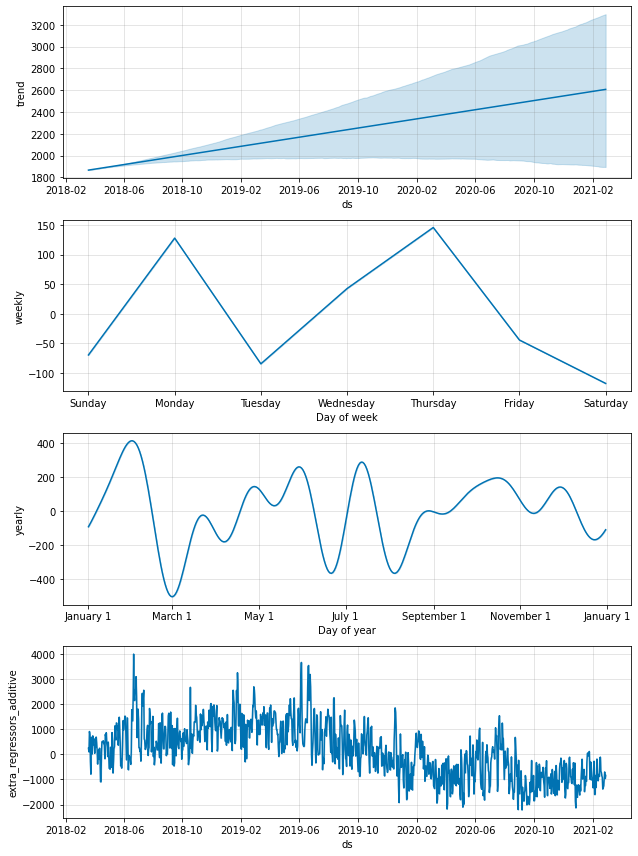

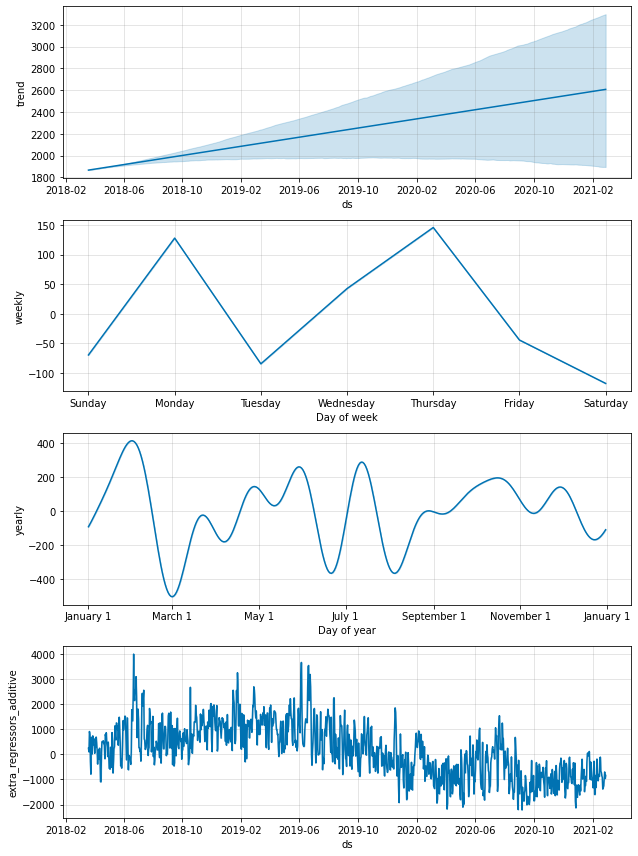

In [150]:
#plot
m.plot_components(forecast_new)

In [151]:
# Split the dataset
traindf = df_daily.iloc[:2757,:]
testdf = df_daily.iloc[2757:,:]
traindf.shape , testdf.shape

((2757, 5), (1077, 5))

In [152]:
# Exclude the Tmax 
df_train = traindf.iloc[:,[0,2,3,4]]
df_test = testdf.iloc[:,[0,2,3,4]]

In [153]:
# Exclude the Tmax 
df_train = traindf.iloc[:,[0,2,3,4]]
df_test = testdf.iloc[:,[0,2,3,4]]
# Rename the columns
df_train = df_train.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})
df_test = df_test.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})

In [154]:
# Model Implementation
m1 = Prophet()
m1.add_regressor('add1')
m1.add_regressor('add2')
m1 = m1.fit(df_train)
forecast_values_new = m1.predict(df_test)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3thssn2a/_hy997nq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3thssn2a/gemlhr6i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7277', 'data', 'file=/tmp/tmp3thssn2a/_hy997nq.json', 'init=/tmp/tmp3thssn2a/gemlhr6i.json', 'output', 'file=/tmp/tmp3thssn2a/prophet_modelu1bf0rgc/prophet_model-20230131195543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:55:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:55:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


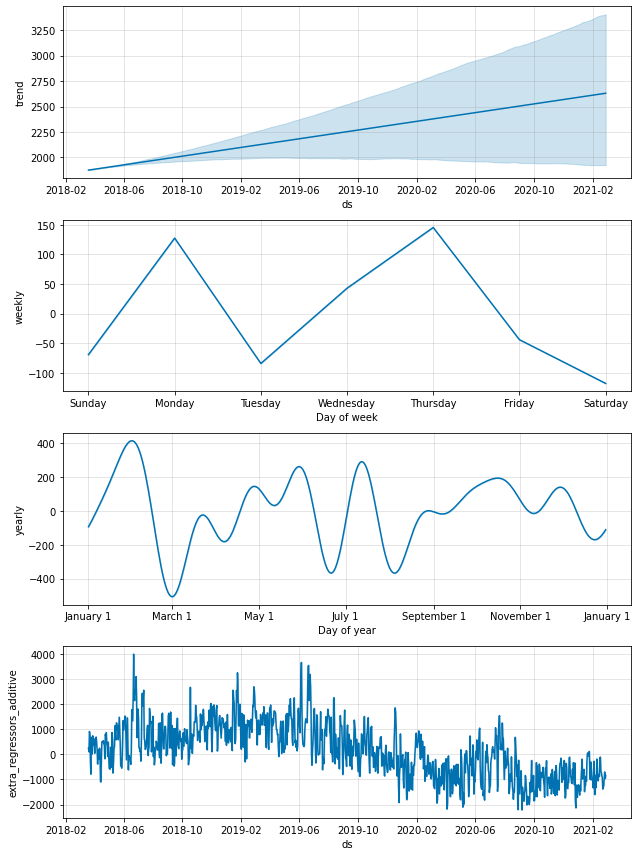

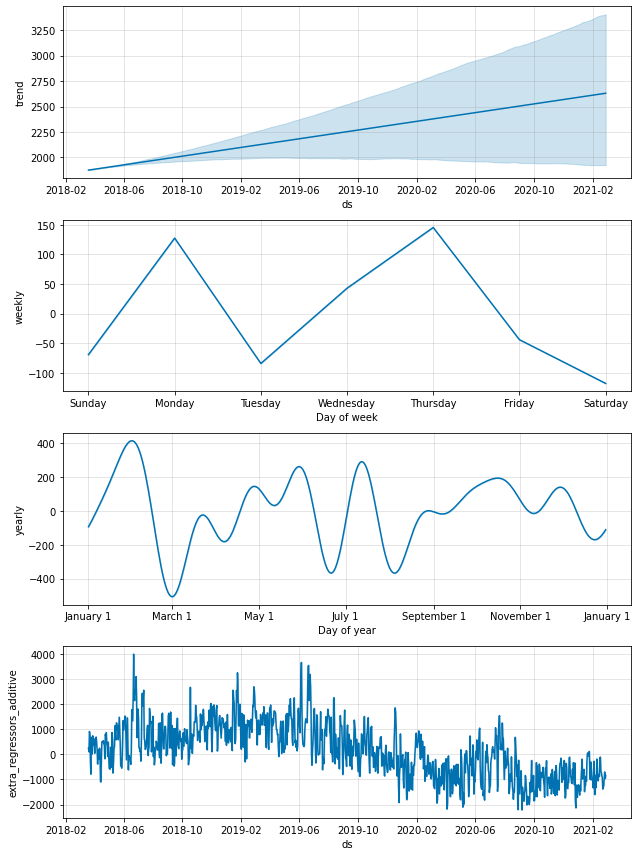

In [155]:
#plot
m1.plot_components(forecast_values_new)

From the plot, thursday is having the highest value.

Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),

What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

In [156]:
#mape
MAPE = Metric(df_test['y'],forecast_values_new['yhat'])
round(MAPE,2)

235.11

Q. Which of the following best describes stationarity?
Ans. The standard deviation and the mean does not change over time.

Q. In The augmented Dickey-Fuller unit root test, a P value of < 0.05 suggests that ___
Ans. The time series is stationary

Q. The Log differencing data transformation technique is used to remove __ & __ from a time series Data
Ans. Trend & Seasonality

Q. Which time series forecasting model involves the linear combination of past time series values of the target variable to predict future values?
Ans. Moving average model

Q. Which of these is a method employed in performing a train test split on a time series dataset?
Ans. Sliding Window

Q. In the Arima time series forecasting model, the parameters ‘pdq’ represents____?
Ans. Number of non-seasonal Differences, Number of Past time steps, Past Errors/Residuals

Q. Which of these imputation methods is not suitable for a time series data that is to be used for modeling?
Ans. Filling with a very large integer value

Q. Which of these is not a behaviour exhibited by a time series data
Ans. Linearity

Q. The time series model of order ___ states that the current time series value is linearly dependent on the past p values with some white noise?
Ans. AR, order p

Q. The ___ model of order ___ says that the time series is linearly dependent on current and past shock values or noise?
Ans. MA model, order q

